## Import library

In [76]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

## Load image

In [2]:
import zipfile

In [3]:
path = '/content/drive/MyDrive/Tự Học/CV_master/Data/Datasets/cat_dog_2.zip'

In [4]:
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

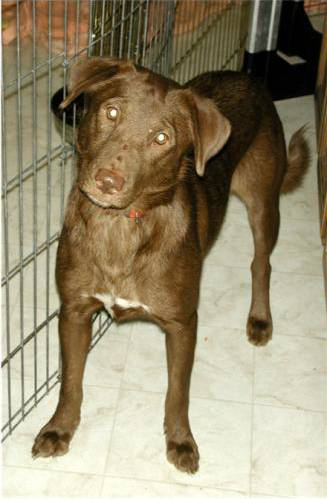

In [5]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.1.jpg')

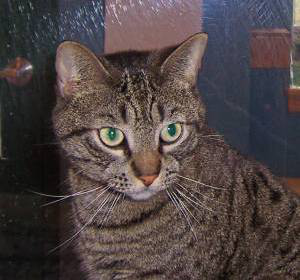

In [6]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.1.jpg')

## Train test split

In [7]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2,)

In [105]:
train_dataset = training_generator.flow_from_directory('/content/cat_dog_2/training_set',
                                                       target_size = (128,128),
                                                       batch_size = 8,
                                                       class_mode = 'categorical',
                                                       shuffle = True)

Found 4000 images belonging to 2 classes.


In [13]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [106]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = training_generator.flow_from_directory('/content/cat_dog_2/test_set',
                                                       target_size = (128,128),
                                                       batch_size = 1,
                                                       class_mode = 'categorical',
                                                       shuffle = False)

Found 1000 images belonging to 2 classes.


## Building model

In [77]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [107]:
for layer in model_vgg16_conv.layers:
        layer.trainable = False

In [108]:
input = Input(shape=(128, 128, 3), name='image_input')

In [109]:
output_vgg16_conv = model_vgg16_conv(input)

In [110]:
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax', name='predictions')(x)

In [111]:
my_model = Model(inputs=input, outputs=x)
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
filepath="weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [112]:
vgghist=my_model.fit_generator(train_dataset,
                               epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
500/500 [==============================] - 41s 76ms/step - loss: 0.8888 - accuracy: 0.7615
Epoch 2/10
500/500 [==============================] - 38s 76ms/step - loss: 0.4362 - accuracy: 0.8155
Epoch 3/10
500/500 [==============================] - 39s 78ms/step - loss: 0.4088 - accuracy: 0.8260
Epoch 4/10
500/500 [==============================] - 39s 78ms/step - loss: 0.4050 - accuracy: 0.8085
Epoch 5/10
500/500 [==============================] - 38s 76ms/step - loss: 0.3930 - accuracy: 0.8248
Epoch 6/10
500/500 [==============================] - 38s 76ms/step - loss: 0.4173 - accuracy: 0.8067
Epoch 7/10
500/500 [==============================] - 37s 74ms/step - loss: 0.3732 - accuracy: 0.8170
Epoch 8/10
500/500 [==============================] - 37s 74ms/step - loss: 0.3672 - accuracy: 0.8183
Epoch 9/10
500/500 [==============================] - 37s 74ms/step - loss: 0.3807 - accuracy: 0.8170
Epoch 10/10
500/500 [==============================] - 37s 74ms/step - loss: 0.386

## Evaluating

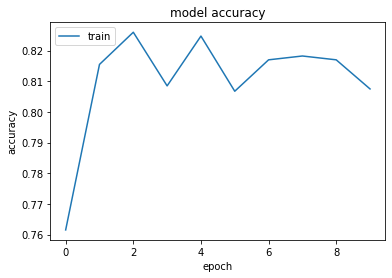

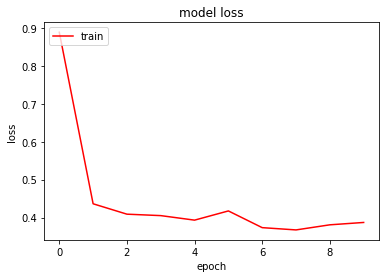

In [113]:
# summarize history for accuracy
plt.plot(vgghist.history['accuracy'])
#plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(vgghist.history['loss'], color='red')
#plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [114]:
predict = my_model.predict(test_dataset)

In [115]:
predict = np.argmax(predict, axis=1)

In [65]:
predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [116]:
print(accuracy_score(test_dataset.classes, predict))

0.861


In [117]:
print(classification_report(test_dataset.classes, predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       500
           1       0.88      0.83      0.86       500

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



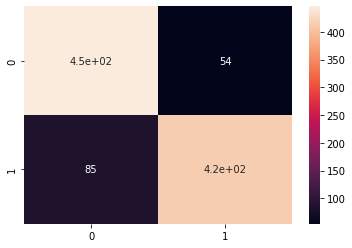

In [118]:
cm = confusion_matrix(test_dataset.classes, predict)
sns.heatmap(cm, annot=True)

## Save and load model

In [119]:
from keras.models import save_model, load_model

In [120]:
save_model(my_model, 'classify_cat_and_dog.h5')

In [ ]:
model_saved = load_model('/content/classify_homer_and_bart.h5')

## Classify an image

In [131]:
from keras.preprocessing import image
test_img = image.load_img('/content/cat_dog_2/test_set/cat/cat.3520.jpg', target_size=(128,128))

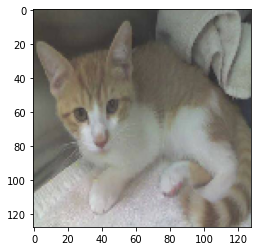

In [132]:
plt.imshow(test_img)

In [133]:
test_img = image.img_to_array(test_img)
test_img.shape

(128, 128, 3)

In [134]:
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

(1, 128, 128, 3)

In [135]:
predict = my_model.predict(test_img, 2)
np.argmax(predict, axis=1)

array([0])